-------------------------------------------------------
Kristian Louka

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Greece_data.csv')


# Calculate the positivity rate
df['Positivity Rate'] = (df['Cases'] / df['Daily tests']) * 100


# View the DataFrame with the positivity rate
print(df.head())

   Entity        Date  Daily tests  Cases  Deaths  Positivity Rate
0  Greece  2020-03-13        520.0  190.0     1.0        36.538462
1  Greece  2020-03-14        700.0  228.0     3.0        32.571429
2  Greece  2020-03-15        600.0  331.0     4.0        55.166667
3  Greece  2020-03-16        320.0  331.0     4.0       103.437500
4  Greece  2020-03-21        658.0  530.0    13.0        80.547112


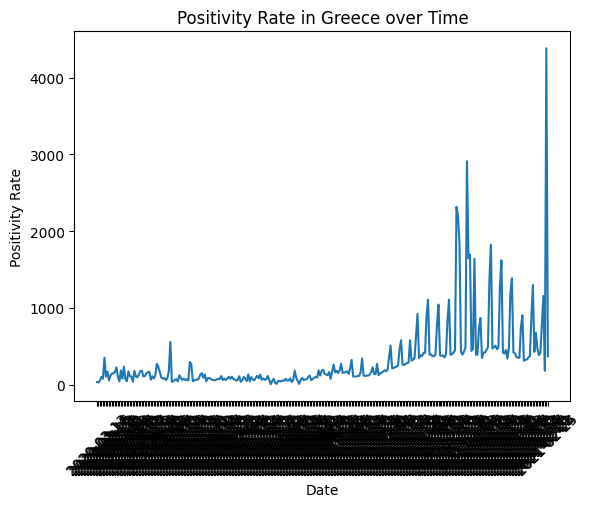

In [ ]:
import matplotlib.pyplot as plt

# Plot the positivity rate over time
plt.plot(df['Date'], df['Positivity Rate'])
plt.xlabel('Date')
plt.ylabel('Positivity Rate')
plt.title('Positivity Rate in Greece over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('Greece_data.csv')

# Extract the relevant columns for training
X = data[['Daily tests', 'Cases', 'Deaths']].values
y = (data['Positivity Rate'] == (data['Cases'] / data['Daily tests']) * 100).values

# Normalize the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for RNN
sequence_length = 241   # Adjust the sequence length based on the available data size
X_train = np.reshape(X_train, (X_train.shape[0], sequence_length, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], sequence_length, X_test.shape[1]))

# Create the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(sequence_length, X_train.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions
X_future = X_scaled[-sequence_length:]  # Last sequence_length data points
X_future = np.reshape(X_future, (1, sequence_length, X_future.shape[1]))
future_positivity_rate = model.predict(X_future)
print("Predicted future positivity rate:", future_positivity_rate[0][0])

KeyError: ignored

Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Dataset

In [3]:
#dataset = pd.read_csv('Greece_data.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values

data = pd.read_csv('Greece_data.csv')


#define a reference date
#reference_date = pd.to_datetime('2020-03-13')

#calculate the time difference from the reference date in days
#data['NumericalColumn'] = (data['Date'] - reference_date).dt.total_seconds()/(24*60*60)

data['Positivity Rate'] = (data['Cases'] / data['Daily tests']) * 100
data['Positivity Rate'] = data['Positivity Rate'].round(3)

data['Date'] = pd.to_datetime(data['Date'])

#data['NumericalColumn'] = data['Date'].astype(int) / 10**9


#define a reference date
reference_date = pd.to_datetime('2020-03-13')

#calculate the time difference from the reference date in days
data['NumericalColumn'] = (data['Date'] - reference_date).dt.total_seconds()/(24*60*60)


In [4]:
#define a reference date
reference_date = pd.to_datetime('2020-03-13')

In [5]:
#calculate the time difference from the reference date in days
data['NumericalColumn'] = (data['Date'] - reference_date).dt.total_seconds()/(24*60*60)

data['Date'] = data['NumericalColumn'];

In [6]:
print(data)

     Entity   Date  Daily tests     Cases  Deaths  Positivity Rate  \
0    Greece    0.0        520.0     190.0     1.0           36.538   
1    Greece    1.0        700.0     228.0     3.0           32.571   
2    Greece    2.0        600.0     331.0     4.0           55.167   
3    Greece    3.0        320.0     331.0     4.0          103.438   
4    Greece    8.0        658.0     530.0    13.0           80.547   
..      ...    ...          ...       ...     ...              ...   
297  Greece  345.0      23139.0  179802.0  6297.0          777.052   
298  Greece  346.0      15610.0  180672.0  6321.0         1157.412   
299  Greece  347.0     100543.0  182783.0  6343.0          181.796   
300  Greece  348.0       4215.0  184686.0  6371.0         4381.637   
301  Greece  349.0      50247.0  186469.0  6410.0          371.105   

     NumericalColumn  
0                0.0  
1                1.0  
2                2.0  
3                3.0  
4                8.0  
..               ... 

In [7]:
print(data.iloc[:, -2]) #positivity rate ( I Want to predict -> y)

0        36.538
1        32.571
2        55.167
3       103.438
4        80.547
         ...   
297     777.052
298    1157.412
299     181.796
300    4381.637
301     371.105
Name: Positivity Rate, Length: 302, dtype: float64


In [8]:
#X takes Date / Daily Tests, Cases, Deaths into consideration (except first and last column)
X = data.iloc[:, 1:-1].values #This selects all rows and all columns starting from the third column
y = data.iloc[:, -2].values 
#this variable y contains the values that we want to predict using the svm regressor
#so we want to predict the positivity rate which is the second last column.

In [104]:
print(X);

[[0.000000e+00 5.200000e+02 1.900000e+02 1.000000e+00 3.653800e+01]
 [1.000000e+00 7.000000e+02 2.280000e+02 3.000000e+00 3.257100e+01]
 [2.000000e+00 6.000000e+02 3.310000e+02 4.000000e+00 5.516700e+01]
 ...
 [3.470000e+02 1.005430e+05 1.827830e+05 6.343000e+03 1.817960e+02]
 [3.480000e+02 4.215000e+03 1.846860e+05 6.371000e+03 4.381637e+03]
 [3.490000e+02 5.024700e+04 1.864690e+05 6.410000e+03 3.711050e+02]]


Splitting the dataset into the training set and test set.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)
#70% Training , 30% Test 

In [106]:
print(X)

[[0.000000e+00 5.200000e+02 1.900000e+02 1.000000e+00 3.653800e+01]
 [1.000000e+00 7.000000e+02 2.280000e+02 3.000000e+00 3.257100e+01]
 [2.000000e+00 6.000000e+02 3.310000e+02 4.000000e+00 5.516700e+01]
 ...
 [3.470000e+02 1.005430e+05 1.827830e+05 6.343000e+03 1.817960e+02]
 [3.480000e+02 4.215000e+03 1.846860e+05 6.371000e+03 4.381637e+03]
 [3.490000e+02 5.024700e+04 1.864690e+05 6.410000e+03 3.711050e+02]]


In [ ]:
print(y)

In [ ]:
print(X_train);

In [ ]:
print(y_train);

In [ ]:
print(X_test);

In [ ]:
print(y_test)

------------------------------------------

Feature Scaling:

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 0.0168115  -0.58146485 -0.63148635 -0.61973146 -0.25988401]
 [-1.78619906 -1.00716199 -0.84003894 -0.75795624 -0.58215192]
 [-1.03167833 -0.82406929 -0.7975601  -0.68051434 -0.47548693]
 ...
 [ 1.61404369 -0.77499357  2.07606123  2.10919479  8.44546379]
 [ 1.07510031  1.05514082  1.351439    1.41897141  0.2530964 ]
 [ 1.24168281 -0.34037959  1.5056876   1.7030751   2.20778737]]


Training the SVM Model on the Training Set 
Importing the necessary modules:

In [12]:
from sklearn.svm import SVR #svr is the class
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regressor = SVR()

#train the SVR regressor on the training data.

regressor.fit(X_train, y_train)



#classifier = SVR(kernel = 'linear', random_state = 0) #we create an object
#classifier.fit(X_train, y_train)

SVR()

Predicting a new result - Make predictions on the testing data:


In [13]:
y_pred = regressor.predict(X_test) 
# y_pred => the predicted values obtained of the trained svm regressor

In [1]:
print(y_pred)

NameError: ignored

Evaluate the performance of the model using various metrics:


In [16]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 153286.88120282805
Mean Absolute Error: 196.09475564002344
R-squared: -0.018188436727882173


Predicting a test set result



In [ ]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Import the necessary modules for hyperparameter tuning:



In [19]:
from sklearn.model_selection import GridSearchCV


In [20]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

In [21]:
regressor = SVR()


In [ ]:
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)